<a href="https://colab.research.google.com/github/shagun122/testline_project/blob/main/testline_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import csv
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Define the URL for the JSON data
json_url = 'https://www.jsonkeeper.com/b/LLQT'
response = requests.get(json_url)
quiz_data = response.json()

# Prepare a list to store data for the CSV
csv_data = []

# Extract quiz questions and process each one
questions = quiz_data.get('quiz', {}).get('questions', [])
for q in questions:
    q_id = q.get('id', '')
    options = q.get('options', [])

    # Collect option details and find the correct one
    options_dict = {}
    correct_option_id = None
    for idx, opt in enumerate(options, start=1):
        option_key = f'option {idx}'
        options_dict[option_key] = opt.get('id', '')
        if opt.get('is_correct', False):
            correct_option_id = opt.get('id', '')

    # Compile the row for the current question
    question_row = {'question_id': q_id, **options_dict, 'correct option': correct_option_id}
    csv_data.append(question_row)

# Convert the list of rows to a DataFrame and save as CSV
output_path = 'questions.csv'
df = pd.DataFrame(csv_data)
df.to_csv(output_path, index=False)

print(f"CSV file has been generated successfully! You can find it at {output_path}")


CSV file has been generated successfully! You can find it at questions.csv


In [ ]:
def process_quiz_data(quiz_data):
    """
    Processes quiz data to extract relevant fields for CSV writing.
    """
    results = []

    for entry in quiz_data:
        # Prepare the row dictionary with default values
        row_data = {
            "id": entry.get("id"),
            "quiz_id": entry.get("quiz_id"),
            "score": entry.get("score"),
            "trophy_level": entry.get("trophy_level"),
            "accuracy": entry.get("accuracy"),
            "speed": entry.get("speed"),
            "final_score": entry.get("final_score"),
            "negative_score": entry.get("negative_score"),
            "correct_answers": entry.get("correct_answers"),
            "incorrect_answers": entry.get("incorrect_answers"),
            "better_than": entry.get("better_than"),
            "rank_text": entry.get("rank_text"),
            "title": entry.get("quiz", {}).get("title"),
            "topic": entry.get("quiz", {}).get("topic"),
        }
        results.append(row_data)

    return results

# Fetch data from the URL
url = "https://api.jsonserve.com/XgAgFJ"
response = requests.get(url)

if response.ok:  # Check if the response is successful
    data = response.json()

    # Process the quiz data
    formatted_data = process_quiz_data(data)

    # Define the static column headers
    column_headers = [
        "id", "quiz_id", "score", "trophy_level", "accuracy", "speed",
        "final_score", "negative_score", "correct_answers", "incorrect_answers",
        "better_than", "rank_text", "title", "topic"
    ]

    # Write data into a CSV file
    output_file = "user_quiz_data.csv"
    with open(output_file, mode="w", newline="") as file:
        csv_writer = csv.DictWriter(file, fieldnames=column_headers)
        csv_writer.writeheader()

        for row in formatted_data:
            csv_writer.writerow(row)

    print(f"Data successfully written to {output_file}")
else:
    print(f"Error: Unable to fetch data. HTTP Status Code: {response.status_code}")


Data successfully written to user_quiz_data.csv


In [ ]:
# Load existing CSV data
csv_data_path = "user_quiz_data.csv"
csv_df = pd.read_csv(csv_data_path)

# Fetch the JSON data from the given URL
json_url = "https://api.jsonserve.com/XgAgFJ"
response = requests.get(json_url)

if response.ok:  # Ensure the response is valid
    json_data = response.json()

    # Normalize the JSON data into a DataFrame
    json_df = pd.json_normalize(json_data)

    # Function to compute duration based on start and end times
    def compute_duration(record):
        start_time = datetime.strptime(record['started_at'][11:16], "%H:%M")
        end_time = datetime.strptime(record['ended_at'][11:16], "%H:%M")
        duration_minutes = (end_time - start_time).total_seconds() / 60
        return duration_minutes

    # Add a new column `time_taken` to the JSON DataFrame
    json_df['time_taken'] = json_df.apply(compute_duration, axis=1)

    # Merge `time_taken` from JSON to CSV DataFrame using the common `id` field
    csv_df['time_taken'] = json_df['time_taken']

    # Save the updated data to a new CSV file
    output_file_path = "user_quiz_data_with_duration.csv"
    csv_df.to_csv(output_file_path, index=False)

    print(f"Updated data with duration has been saved to {output_file_path}")
else:
    print(f"Failed to fetch JSON data. HTTP Status Code: {response.status_code}")


Updated data with duration has been saved to user_quiz_data_with_duration.csv


In [ ]:
# Define the input and output file paths
input_csv_path = "user_quiz_data_with_duration.csv"
output_csv_path = "user_quiz_data_with_normalized_score.csv"

# Load the data from the CSV file
quiz_data = pd.read_csv(input_csv_path)

# Add a new column to compute the total number of questions
quiz_data['total_questions'] = quiz_data['correct_answers'] + quiz_data['incorrect_answers']

# Calculate the normalized score as final_score divided by total_questions
quiz_data['normalized_score'] = quiz_data['final_score'] / quiz_data['total_questions']

# Save the updated DataFrame to a new CSV file
quiz_data.to_csv(output_csv_path, index=False)

print(f"Normalized score has been added and the updated data is saved to: {output_csv_path}")


Normalized score has been added and the updated data is saved to: user_quiz_data_with_normalized_score.csv



Task 1: Accuracy Distribution Analysis


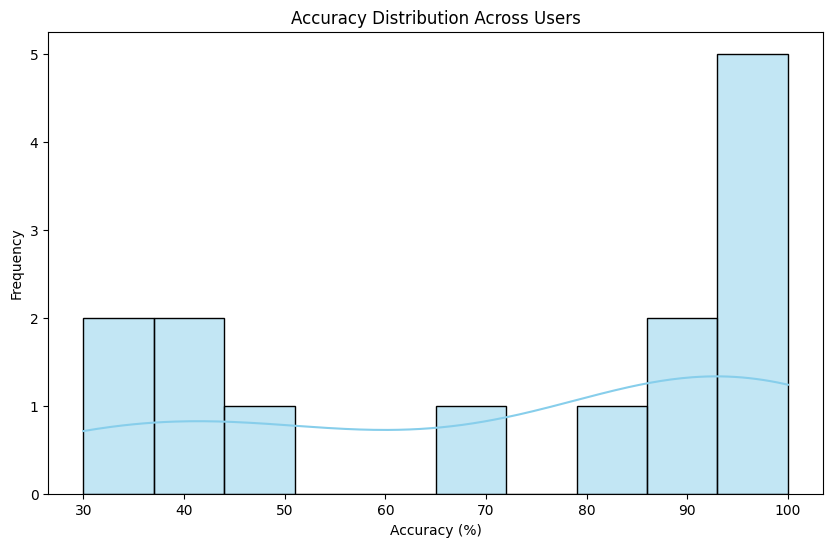

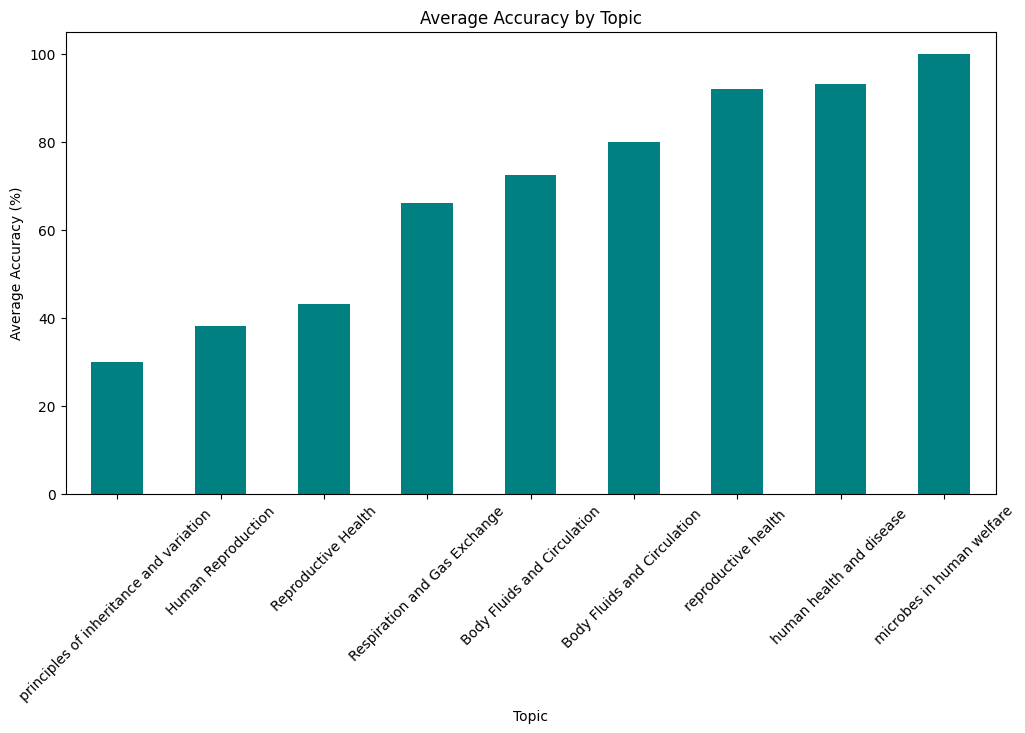

topic
principles of inheritance and variation      30.000000
Human Reproduction                           38.000000
Reproductive Health                          43.000000
Respiration and Gas Exchange                 66.000000
Body Fluids and Circulation                  72.333333
Body Fluids and Circulation                  80.000000
reproductive health                          92.000000
human health and disease                     93.000000
microbes in human welfare                   100.000000
Name: accuracy_pct, dtype: float64

Task 2: Performance Insights

Weak Topics:
topic
principles of inheritance and variation     30.0
Human Reproduction                          38.0
Reproductive Health                         43.0
Name: accuracy_pct, dtype: float64

Performance Gaps:
                                          min_score  max_score  mean_score  \
topic                                                                        
Body Fluids and Circulation                      36      

In [ ]:
def read_csv_data(file_path):
    """Load the CSV file into a DataFrame."""
    return pd.read_csv(file_path)

def analyze_accuracy_distribution(df):
    """Analyze the distribution of response accuracy and calculate topic-wise accuracy."""
    # Convert accuracy percentages to numeric values
    df['accuracy_pct'] = df['accuracy'].str.rstrip('%').astype(float)

    # Plot the overall accuracy distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['accuracy_pct'], bins=10, kde=True, color="skyblue")
    plt.title("Accuracy Distribution Across Users")
    plt.xlabel("Accuracy (%)")
    plt.ylabel("Frequency")
    plt.show()

    # Calculate and plot average accuracy by topic
    topic_accuracy = df.groupby('topic')['accuracy_pct'].mean().sort_values()
    topic_accuracy.plot(kind='bar', color='teal', figsize=(12, 6))
    plt.title("Average Accuracy by Topic")
    plt.xlabel("Topic")
    plt.ylabel("Average Accuracy (%)")
    plt.xticks(rotation=45)
    plt.show()

    return topic_accuracy

def generate_performance_insights(df):
    """Generate performance-related insights."""
    insights = {}

    # Convert accuracy percentage to numeric for calculations
    df['accuracy_pct'] = df['accuracy'].str.rstrip('%').astype(float)

    # Identify weak areas (topics with the lowest average accuracy)
    weak_topics = df.groupby('topic')['accuracy_pct'].mean().nsmallest(3)
    insights['Weak Topics'] = weak_topics

    # Identify performance gaps (min, max, mean scores by topic)
    topic_performance = df.groupby('topic').agg(
        min_score=('score', 'min'),
        max_score=('score', 'max'),
        mean_score=('score', 'mean'),
        avg_accuracy=('accuracy_pct', 'mean')
    )
    insights['Performance Gaps'] = topic_performance

    return insights

def create_actionable_recommendations(df):
    """Provide actionable recommendations based on insights."""
    recommendations = []

    # Convert accuracy percentage to numeric
    df['accuracy_pct'] = df['accuracy'].str.rstrip('%').astype(float)

    # Recommend focus on weak topics
    weak_topics = df.groupby('topic')['accuracy_pct'].mean().nsmallest(3).index.tolist()
    recommendations.append(f"Prioritize studying these weak topics: {', '.join(weak_topics)}")

    # Suggest improving speed if below threshold
    avg_speed = df['speed'].astype(float).mean()
    if avg_speed < 80:
        recommendations.append("Consider working on speed improvement; aim for an average speed of at least 80.")

    # Tailored recommendations for topics with low accuracy
    low_accuracy_topics = df.groupby('topic')['accuracy_pct'].mean()
    for topic, accuracy in low_accuracy_topics.items():
        if accuracy < 50:
            recommendations.append(f"Practice more questions in '{topic}', where accuracy is below 50%.")

    return recommendations

def main_task():
    """Main function to execute analysis, insights, and recommendations."""
    # Define file path
    file_path = 'user_quiz_data_with_normalized_score.csv'

    # Load dataset
    df = read_csv_data(file_path)

    # Task 1: Analyze Accuracy Distribution
    print("\nTask 1: Accuracy Distribution Analysis")
    topic_accuracy = analyze_accuracy_distribution(df)
    print(topic_accuracy)

    # Task 2: Generate Insights
    print("\nTask 2: Performance Insights")
    insights = generate_performance_insights(df)
    for key, value in insights.items():
        print(f"\n{key}:\n{value}")

    # Task 3: Provide Recommendations
    print("\nTask 3: Recommendations")
    recommendations = create_actionable_recommendations(df)
    for rec in recommendations:
        print(f"- {rec}")

# Run the main task
main_task()


In [ ]:
import pandas as pd

def evaluate_student_traits(data):
    """Determine the student persona based on performance metrics."""
    traits = {}

    # Evaluate consistency
    high_accuracy = (data['accuracy'].str.rstrip('%').astype(float) >= 90).mean()
    low_accuracy = (data['accuracy'].str.rstrip('%').astype(float) < 50).mean()

    if high_accuracy > 0.7:
        traits['persona_category'] = "Consistent High Performer"
    elif low_accuracy > 0.5:
        traits['persona_category'] = "Inconsistent Performer"
    else:
        traits['persona_category'] = "Improving Learner"

    # Assess response speed
    mean_speed = data['speed'].astype(float).mean()
    if mean_speed > 95:
        traits['response_speed'] = "Fast Thinker"
    elif mean_speed > 70:
        traits['response_speed'] = "Balanced Thinker"
    else:
        traits['response_speed'] = "Methodical Thinker"

    # Analyze trophy level
    average_trophy = data['trophy_level'].mean()
    if average_trophy > 2:
        traits['trophy_level'] = "Competitive Achiever"
    elif average_trophy == 2:
        traits['trophy_level'] = "Dedicated Competitor"
    else:
        traits['trophy_level'] = "Casual Learner"

    # Combine accuracy and speed insights
    accuracy = data['accuracy'].str.rstrip('%').astype(float).mean()
    speed = data['speed'].astype(float).mean()

    if accuracy >= 90 and speed >= 95:
        traits['accuracy_speed_trait'] = "Sharp Shooter"
    elif accuracy >= 90:
        traits['accuracy_speed_trait'] = "Precise Strategist"
    elif accuracy > 70 and speed >= 95:
        traits['accuracy_speed_trait'] = "Quick Responder"
    else:
        traits['accuracy_speed_trait'] = "Steady Learner"

    # Analyze time efficiency
    avg_time = data['time_taken'].astype(float).mean()

    if accuracy >= 90 and avg_time <= 10:
        traits['time_efficiency'] = "Accurate and Fast"
    elif accuracy >= 90:
        traits['time_efficiency'] = "Accurate and Thoughtful"
    elif accuracy >= 70 and avg_time <= 10:
        traits['time_efficiency'] = "Moderately Accurate and Quick"
    else:
        traits['time_efficiency'] = "Needs Focus and Time"

    return traits

def analyze_performance_insights(data):
    """Highlight the strengths and weaknesses based on the dataset."""
    strengths, weaknesses = [], []

    # Assessing strengths
    if (data['correct_answers'] > 20).mean() > 0.5:
        strengths.append("Strong Problem-Solving Skills in Complex Topics")
    if data['better_than'].mean() > 100:
        strengths.append("Consistently Outperforming Peers")

    # Avoid unused columns or overly niche insights
    # Example: rank_text omitted as it was not directly useful

    # Assessing weaknesses
    if (data['negative_score'].astype(float) > 10).mean() > 0.3:
        weaknesses.append("Challenges with Negative Marking")
    if (data['accuracy'].str.rstrip('%').astype(float) < 60).mean() > 0.5:
        weaknesses.append("Accuracy Needs Improvement")
    if data['final_score'].mean() < 50:
        weaknesses.append("Below Average Overall Scores")

    # Prepare insights as labels
    insights = {
        "strengths": ", ".join(strengths) if strengths else "No notable strengths detected.",
        "weaknesses": ", ".join(weaknesses) if weaknesses else "No significant weaknesses identified."
    }

    return insights

def execute_analysis():
    """Load data and perform the complete analysis."""
    # Load quiz data
    file_path = "user_quiz_data_with_normalized_score.csv"
    data = pd.read_csv(file_path)

    # Step 1: Analyze student traits
    traits = evaluate_student_traits(data)
    print("Student Persona Analysis:")
    for key, value in traits.items():
        print(f"- {key.replace('_', ' ').capitalize()}: {value}")

    # Step 2: Identify strengths and weaknesses
    insights = analyze_performance_insights(data)
    print("\nPerformance Insights:")
    for key, value in insights.items():
        print(f"- {key.capitalize()}: {value}")

# Execute the program
if __name__ == "__main__":
    execute_analysis()

Student Persona Analysis:
- Persona category: Improving Learner
- Response speed: Fast Thinker
- Trophy level: Competitive Achiever
- Accuracy speed trait: Quick Responder
- Time efficiency: Moderately Accurate and Quick

Performance Insights:
- Strengths: Consistently Outperforming Peers
- Weaknesses: No significant weaknesses identified.
